In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load the CSV file 
file_path = 'song_data.csv'
df = pd.read_csv(file_path)

X = df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 
        'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 
        'audio_valence']]

y = df['song_popularity']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Build the neural network
model = MLPRegressor(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

Mean Absolute Error: 15.899743285970903
Mean Squared Error: 405.184091347732
Root Mean Squared Error: 20.129185064173164


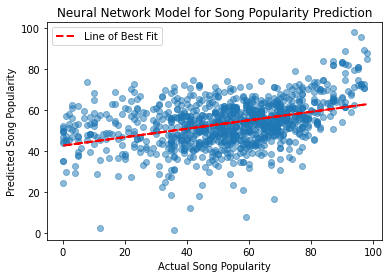

In [32]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Song Popularity')
plt.ylabel('Predicted Song Popularity')
plt.title('Neural Network Model for Song Popularity Prediction')

# Add a line of best fit
fit_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, fit_line[0] * y_test + fit_line[1], color='red', linestyle='--', linewidth=2, label='Line of Best Fit')

plt.legend()
plt.show()